# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [150]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras

from tensorflow.keras.models import load_model
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import keras_tuner as kt
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
#from tensorflow.keras import callbacks
#from tensorflow.keras.callbacks.EarlyStopping

## Loading the dataset

In [151]:
df = pd.read_csv("bank-1.csv")  # Complete the code to read the dataset 

## Data Overview

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [153]:
df.head() #rownumber is sequencial and should be rmeoved, Exited is target variable


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [155]:
df.isnull().sum() # no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [156]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [157]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [158]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [159]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
    

In [160]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

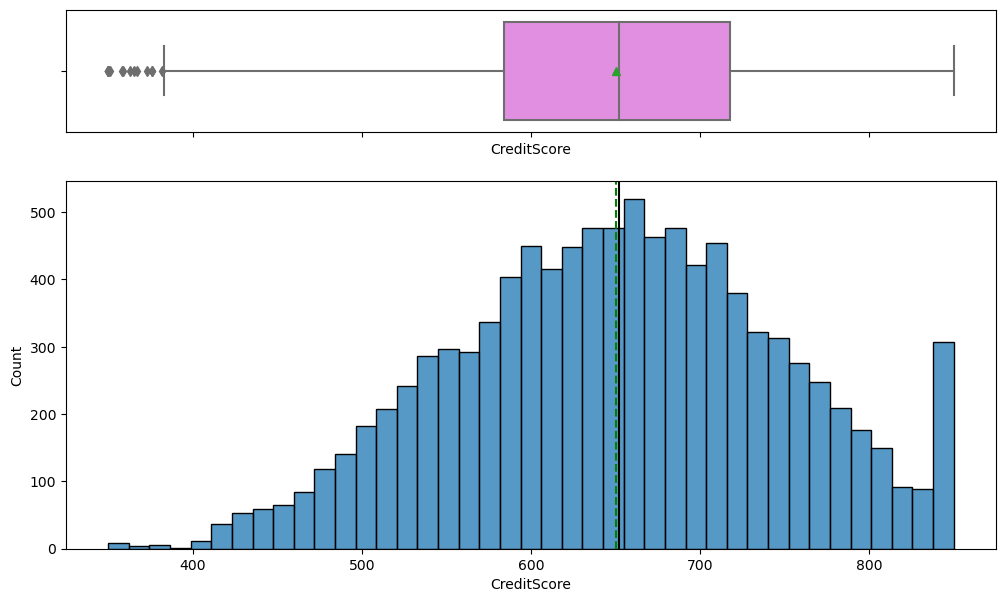

In [161]:
histogram_boxplot(df,"CreditScore")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


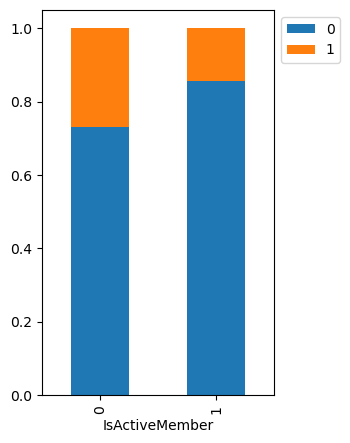

In [162]:
stacked_barplot(df,"IsActiveMember","Exited")

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


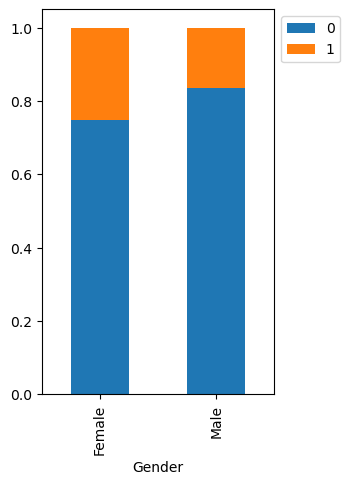

In [163]:
stacked_barplot(df,"Gender","Exited")

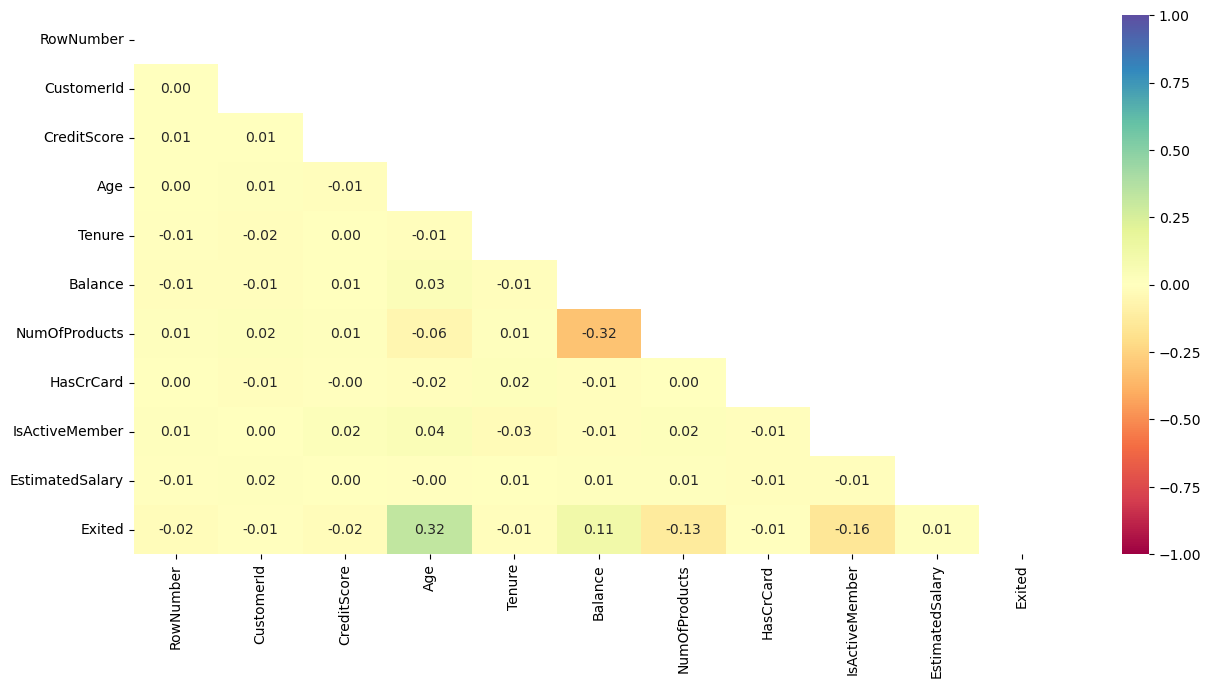

In [164]:
plt.figure(figsize=(15, 7))
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr(method='spearman')
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",mask=mask) 
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


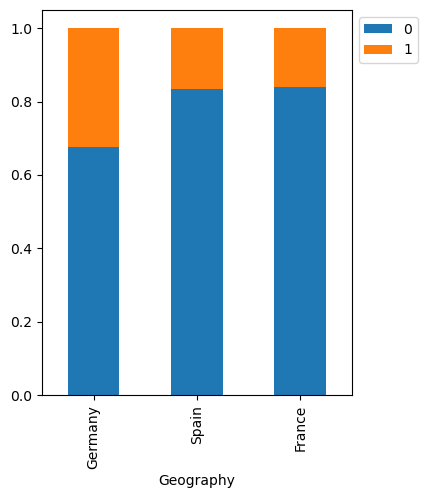

In [165]:
stacked_barplot(df,"Geography","Exited")

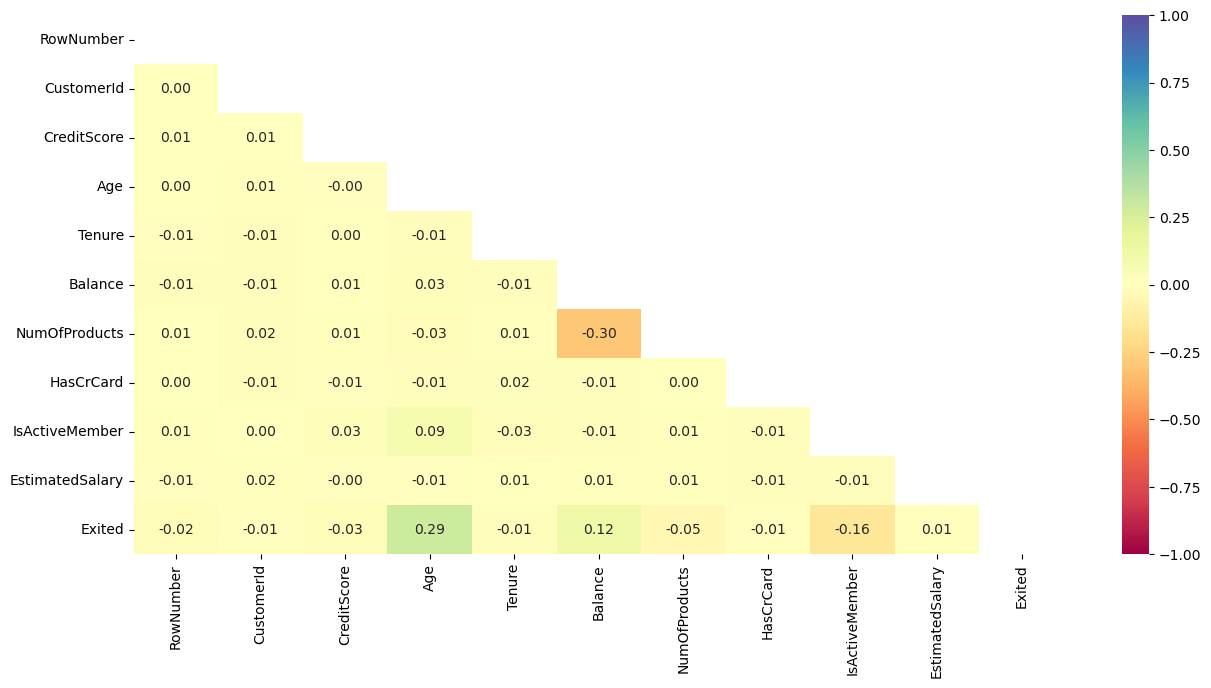

In [166]:
plt.figure(figsize=(15, 7))
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",mask=mask) 
plt.show()

In [167]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
#data = df.copy()

In [169]:
df.shape

(10000, 14)

In [170]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [171]:
df.shape

(10000, 11)

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [172]:
df.describe(include=["object"]).T #show only object

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [173]:
for col in df.select_dtypes(include=['object']).columns: # find all columns that are object and convert them to category
    df[col] = df[col].astype("category")

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [175]:
X = df.drop(["Exited"], axis=1) 
y = df["Exited"] 


In [176]:
X.shape,y.shape

((10000, 10), (10000,))

In [177]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [178]:
# We are doing dummies after split
# we should check if this has not caused issues in test and train having different columns
X_train = pd.get_dummies(data=X_train, drop_first=True) 
X_val = pd.get_dummies(data=X_val, drop_first=True) 
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [179]:
assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1] # check if columns are same if not then alignment is required

In [180]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [181]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
col_to_scale = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
fitter_scaler = sc.fit(X_train[col_to_scale])
X_train[col_to_scale] = fitter_scaler.transform(X_train[col_to_scale])
X_test[col_to_scale] = fitter_scaler.transform(X_test[col_to_scale])
X_val[col_to_scale] = fitter_scaler.transform(X_val[col_to_scale])

In [182]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

In [183]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [184]:
X_train = tf.convert_to_tensor(X_train.astype('float32'))
y_train = tf.convert_to_tensor(y_train.astype('float32'))
X_val = tf.convert_to_tensor(X_val.astype('float32'))
y_val = tf.convert_to_tensor(y_val.astype('float32'))
X_test = tf.convert_to_tensor(X_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('float32'))

## Model Building

In [185]:
def clear_session():
    print("Clearing Backend Session")
    keras.backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

In [193]:
def create_model(optimizer_name="Adam",units=64,add_drop_out=False,dropout_rate=.25,
                 batch_norm=False,number_of_hidden_layer=2,learning_rate=0.001):
    
    model = Sequential()
    model.add(Dense(units,activation = 'relu',input_dim = 11, name=f'Input'))
    if add_drop_out is True:
        model.add(Dropout(dropout_rate))
        
    for i in range(number_of_hidden_layer):
        if batch_norm is True:
            model.add(BatchNormalization())
        model.add(Dense(units, activation='relu', kernel_initializer="he_uniform", name=f'HiddenDense{i}'))
        if add_drop_out is True:
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(1, activation = 'sigmoid',name=f'OutputSigmoid'))
    if optimizer_name.upper() == "Adam".upper():
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.upper() =="SGD".upper():
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name.upper() =="RMSProp".upper():
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise "Error in optimizer name " + optimizer_name
    
    print(f"optimizer: {optimizer.name} learning_rate={learning_rate}")
    model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(from_logits=True),  
                  metrics=[keras.metrics.BinaryAccuracy()])
    print("after compile")
    return model

def model_fit(model,model_name='best_model.h5',monitor="val_loss",min_delta=0.001,patience=5,epochs=100):
    model.summary()
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5, restore_best_weights=True)
    model_checkpoint = keras.callbacks.ModelCheckpoint(model_name + ".h5", save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=epochs, batch_size=32,callbacks=[early_stopping, model_checkpoint])
    best_model = keras.models.load_model(model_name + ".h5")
    return best_model,history

def model_eval(model,X_test,y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    display_confusion_matrix(model,X_test)
    return loss,accuracy

In [194]:
def display_history(title,history):
    hist  = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.title(title)
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(("train" , "valid") , loc =0)

def display_confusion_matrix(model,X_val):
    y_pred=model.predict(X_val)
    #print(f"y_pred {y_pred[:10]}")
    #Let's predict using default threshold
    y_pred = (y_pred > 0.5)
    cm2=confusion_matrix(y_val, y_pred)
    labels = ['True Negative','False Positive','False Negative','True Positive']
    categories = [ 'Not_Exited','Exited']
    make_confusion_matrix(cm2, 
                          group_names=labels,
                          categories=categories, 
                          cmap='Blues')

In [195]:
epochs = 10

### Model Evaluation Criterion

Clearing Backend Session
optimizer: SGD learning_rate=0.001
after compile
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 96)                1152      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 HiddenDense0 (Dense)        (None, 96)                9312      
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 HiddenDense1 (Dense)        (None, 96)                9312      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                

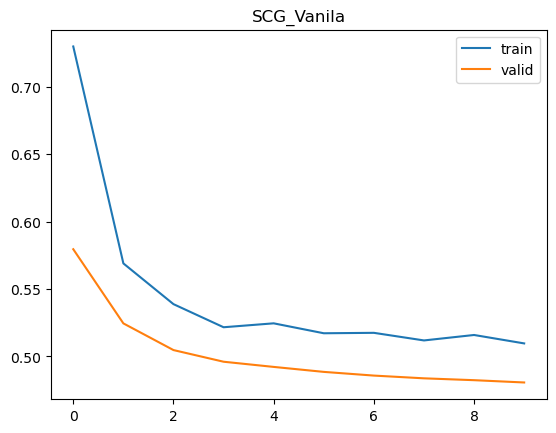

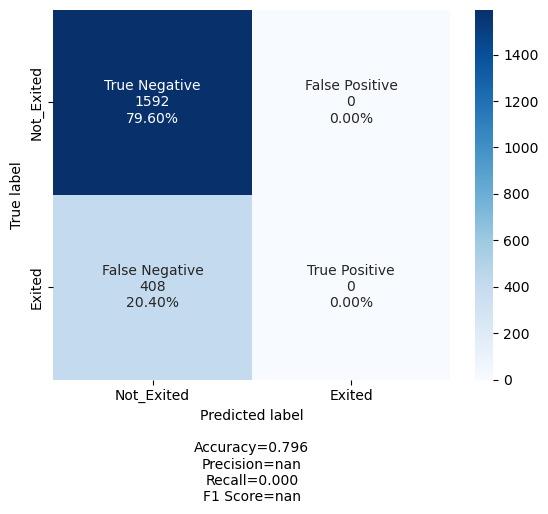

In [196]:
clear_session()
number_of_hidden_layer = 4
units = 96
learning_rate = 0.001
batch_norm = False
add_drop_out = True 
dropout_rate= 0.1
model = create_model(optimizer_name="SGD",
                     units=64+(32*1),
                     add_drop_out=add_drop_out,
                     batch_norm=False,
                     learning_rate=learning_rate,
                     number_of_hidden_layer=number_of_hidden_layer)

model_name = "SCG_Vanila"
epochs = 10
scg_model,scg_history = model_fit(model,model_name=model_name,monitor="val_loss",min_delta=0.001,patience=5,epochs=epochs)
display_history(model_name,scg_history)
loss, accuracy = model_eval(scg_model,X_test,y_test)    


### Model Building: Neural Network model with Adam Optimizer

Clearing Backend Session
optimizer: Adam learning_rate=0.001
after compile
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                768       
                                                                 
 HiddenDense0 (Dense)        (None, 64)                4160      
                                                                 
 HiddenDense1 (Dense)        (None, 64)                4160      
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 65        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
188/188 [==============================] - 2s 5ms/step - loss: 0.4592 - binary_accuracy: 0.7895 - va

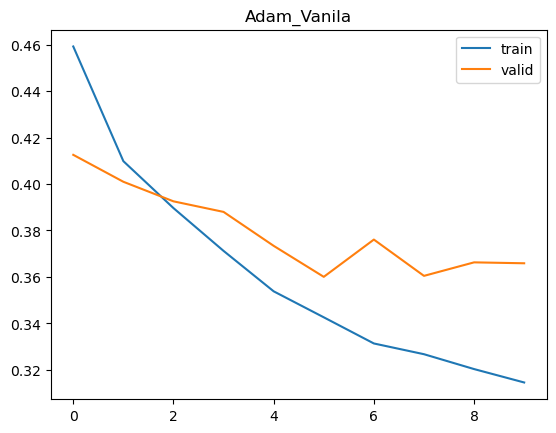

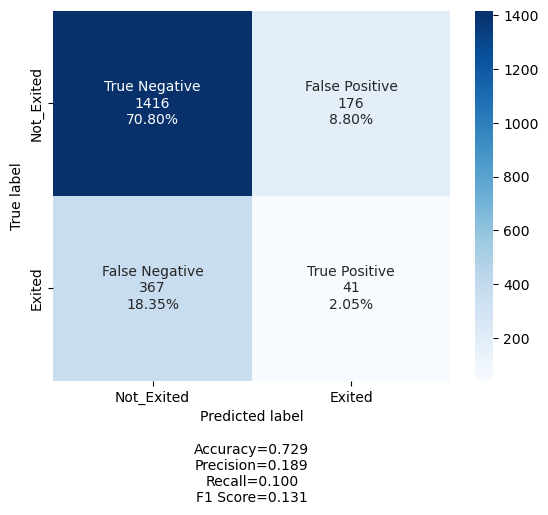

In [197]:
clear_session()
model = create_model(optimizer_name="ADAM",
                     add_drop_out=False,
                     batch_norm=False,
                     learning_rate=0.001,
                     number_of_hidden_layer=2)

model_name = "Adam_Vanila"

adam_model,adam_history = model_fit(model,model_name=model_name,monitor="val_loss",min_delta=0.001,patience=5,epochs=epochs)
display_history(model_name,adam_history)
loss, accuracy = model_eval(adam_model,X_test,y_test)  


### Model Improvement: Neural Network model with Dropout

Clearing Backend Session
optimizer: Adam learning_rate=0.001
after compile
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 HiddenDense0 (Dense)        (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 HiddenDense1 (Dense)        (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                               

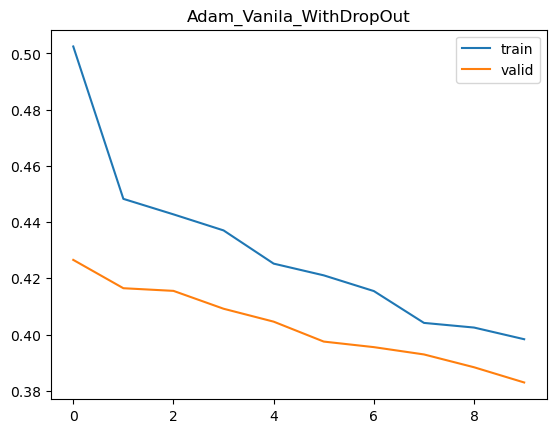

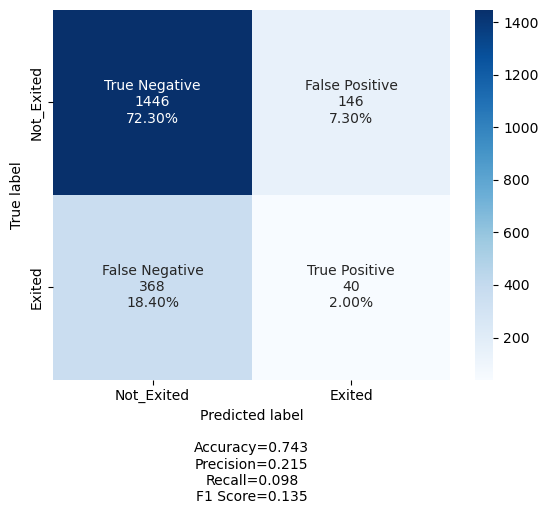

In [198]:
clear_session()


model = create_model(optimizer_name="ADAM",
                     add_drop_out=True,
                     batch_norm=False,
                     learning_rate=0.001,
                     number_of_hidden_layer=2)

model_name = "Adam_Vanila_WithDropOut"

adam_dropout_model,adam_dropout_history = model_fit(model,model_name=model_name,monitor="val_loss",min_delta=0.001,patience=5,epochs=epochs)
display_history(model_name,adam_dropout_history)
loss, accuracy = model_eval(adam_dropout_model,X_test,y_test)  

### Model Improvement: Neural Network model with Hyperparameter tuning

In [201]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create a Keras model
def create_keras_model():
    model = keras.models.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(8,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Wrap the Keras model in a KerasClassifier
model = KerasClassifier(build_fn=create_keras_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters to search
param_grid = {'epochs': [10, 20, 30],
              'batch_size': [32, 64, 128]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X_train,y_train)

In [200]:
param_random = {
    'optimizer_name' : ['Adam'],
    'units': [64, 128],
    'learning_rate': [0.01, 0.001, 0.0001],
    'number_of_hidden_layer':[3,4,5],
    'dropout_rate': [0.25,0.50],
    'batch_norm': [True, False],
    'add_drop_out': [True, False]
}
        
model = KerasClassifier(build_fn=create_model,verbose=1)
randomCv = RandomizedSearchCV(estimator=model, param_distributions=param_random,cv=3)
 
random_result = randomCv.fit(X_train, y_train,validation_split=0.2,verbose=1) 



TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([2000, 2001, 2002, ..., 5997, 5998, 5999])

In [ ]:
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

In [95]:
def model_fit(model,model_name='best_model.h5',monitor="val_loss",min_delta=0.001,patience=5,epochs=100):
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5, restore_best_weights=True)
    model_checkpoint = keras.callbacks.ModelCheckpoint(model_name + ".h5", save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=epochs, batch_size=32,callbacks=[early_stopping, model_checkpoint])
    best_model = keras.models.load_model(model_name + ".h5")
    return best_model,history

def model_eval(model,X_test,y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    display_confusion_matrix(model,X_test)
    return loss,accuracy

adam_model,adam_history = model_fit(randomCv,model_name="tuned",monitor="val_loss",min_delta=0.001,patience=5,epochs=epochs)
display_history(model_name,adam_history)
loss, accuracy = model_eval(adam_model,X_test,y_test)  


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([2000, 2001, 2002, ..., 5997, 5998, 5999])

In [45]:
#from tensorflow import keras
import keras_tuner as kt
# Set the backend to TensorFlow

#from tensorflow.keras import layers
class MyHyperModel(kt.HyperModel):
  
    def build(self,hp):
    
        number_of_hidden_layer = hp.Int('num_layers', min_value=3, max_value=10)

        units=hp.Int(f'units', min_value=64, max_value=512, step=32)
        learning_rate = hp.Choice('lr', values=[1e-2, 1e-3, 1e-4])
        add_drop_out = hp.Boolean('add_drop_out')
        if add_drop_out is True:
            dropout_rate = hp.Float('dropout_rate', min_value=0.10, max_value=0.5, step=0.10)
        else:
            dropout_rate = 0.0

        print(f"number_of_hidden_layer: {number_of_hidden_layer}")
        print(f"units: {units}")
        print(f"learning_rate: {learning_rate}")
        print(f"add_drop_out: {add_drop_out} dropout_rate: {dropout_rate}")

        model = create_model(optimizer_name="ADAM",
                         add_drop_out=False,
                         dropout_rate=0.25, ##dropout_rate,
                         batch_norm=False,
                         learning_rate=0.001,
                         units=64,
                         number_of_hidden_layer=3)
        if not isinstance(model, keras.models.Model):
            print("Doo")
        else:
            print("Boo")
        return model
#model_builder(keras_tuner.HyperParameters())
tuner = kt.RandomSearch(
    hypermodel=MyHyperModel(),
    objective="val_accuracy",
    max_trials=3
)

early_stopping =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])


Reloading Tuner from .\untitled_project\tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
7                 |6                 |num_layers
96                |320               |units
0.01              |0.01              |lr
True              |True              |add_drop_out
0.5               |0.4               |dropout_rate

number_of_hidden_layer: 7
units: 96
learning_rate: 0.01
add_drop_out: True dropout_rate: 0.5
optimizer: Adam learning_rate=0.001
after compile
Boo


FatalTypeError: Expected the model-building function, or HyperModel.build() to return a valid Keras Model instance. Received: <keras.src.engine.sequential.Sequential object at 0x000001634A1FF210> of type <class 'keras.src.engine.sequential.Sequential'>.

In [ ]:
model_builder(keras_tuner.HyperParameters())
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search_space_summary()

print(f"epochs {epochs}")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])
model_checkpoint = ModelCheckpoint("tunner.h5", save_best_only=True)
history = tuner.search(X_train, y_train,validation_data=(X_val,y_val), epochs=epochs, batch_size=32,callbacks=[early_stopping, model_checkpoint])

### Model Improvement: Neural Network model with balanced data

## Final Model

## Actionable Insights and Recommendations 

**What recommedations would you suggest to the bank?**

* 

___